# This notebook is for Task 5 only

Improvements Task 5:
- Refer to whatsapp
- Composite of multi views/plots:
    + One is the height histogram 
    + One is the overall histogram (slidable)
    + Filter by dropdown country / region
    + Dropdown affects height and overall, overall also affects height
- Limit number of countries per region

In [1]:
# imports
import altair as alt
import pandas as pd
import sys
import os
# altair specific
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')
# adds parent directory to this notebook, so it could use relative import
sys.path.append(os.path.dirname(os.getcwd()))

# user defined modules
from src.helpers import preprocessing


In [2]:
# helper function
def get_data(data_path, preprocess=False):
    data = pd.read_csv(data_path)
    if preprocess is True:
        fifa_subset = preprocessing(data)
        # store to data
        data = fifa_subset
    return data

In [3]:
# read data here
data_path = "../data/player_raw_data.csv"
# this is raw data
fifa = get_data(data_path)
# this is processed for Task 5 specific
subset = get_data(data_path, preprocess=True)

> 5. Find the range of height that has the best average overall ranking by country 
>
>    (how to phrase this but just finding the best height for performance) (interactive)

To accomplish this:
- One dropdown to control the country
- One plot of `overall histogram` that could brushed to serve as slider
- One plot of `height counts`, linked with `overall histogram`

In [29]:
dup = subset.copy()
dup["country"] = "All"
#dup["region"] = "all"

In [30]:
subset_2 = pd.concat([subset, dup])
subset_2

,name,country,region,age,overall,potential,preferred_foot,skill_move,height,wage,dribbling,ball_control,sprint_speed,strength,shot_power,stamina,aggression
0,Patrick Vroegh,Netherlands,Europe,21,64,73,Left,2,175,3000,61,67,49,56,64,64,58
1,Adam Senior,England,Europe,19,57,67,Right,2,183,900,35,38,65,70,33,54,55
2,Finlay Lockett,England,Europe,18,54,68,Right,3,173,750,56,54,76,43,51,54,38
3,Sergio Lozano Lluch,Spain,Europe,22,62,71,Right,3,175,5000,67,69,62,43,54,60,45
4,Sam Sanna,France,Europe,22,61,70,Right,2,170,1000,65,65,58,46,63,43,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12040,Dominik Stumberger,All,Europe,22,60,66,Left,2,184,2000,42,50,55,70,48,59,55
12041,Alexander Ranacher,All,Europe,22,61,67,Right,3,175,2000,55,60,80,50,57,85,58
12042,Hugo Anglada Gutiérrez,All,Europe,17,60,75,Right,2,182,500,30,56,62,58,51,62,52
12043,Louis Beckett,All,Europe,18,50,65,Right,2,178,700,49,48,61,58,53,50,56


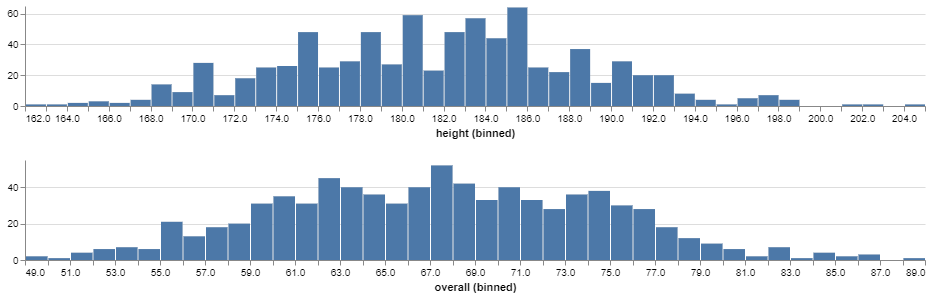

In [49]:
# need to add zoom in
def task_five_viz(data):
    # slider
    brush = alt.selection_interval(
        encodings=["x"], # THis is hard to control both x and y, prefarrably use one encoding only
        resolve="global", # "intersect"
        empty="all" # add option to by default it selects all, to change this use "none" instead
    )
    
    # list of countries and countries
    countries = sorted(data.country.unique())
    countries.remove("All")
    countries.insert(0, "All")
    regions = sorted(data.region.unique())
    
    # country select
    country_sel = alt.selection_single(
        name="Country",
        fields=["country"]
    )
    selection = alt.selection_single(
        name="Select",
        fields=["country", "region"],
        init={"country": "All", "region": "Africa"},
        bind={"country": alt.binding_select(options=countries),
              "region": alt.binding_radio(options=regions)
             }
    )
    
    # histogram for height and overall
    base_hist = alt.Chart(data).mark_bar().encode(
        x = alt.X(alt.repeat("row"), type="quantitative",
                  bin=alt.Bin(maxbins=50)
                 ),
        y = alt.Y('count():Q', title=None)
    )
    # adding these by layers and render it
    ovr_height_hist = alt.layer(base_hist.add_selection(brush).encode(
                                color=alt.value('lightgrey')
    ),
                    base_hist.transform_filter(brush)
    ).properties(
        width=900,
        height=100
    ).repeat(
        row=['height', 'overall'],
        data=data
    ).configure_view(
        stroke='transparent' # no outline
    ).add_selection(selection).transform_filter(selection) # add extra drop down
    # NOTE countries is not updating dynamically
    # Check this https://stackoverflow.com/questions/61754243/altair-controlling-one-dropdown-using-another
    return ovr_height_hist

viz = task_five_viz(data=subset_2) 
viz # use this instead
#viz.interactive() # THiS is extremely hard to control use wisely